# Confusion Matrix

## Introduction

Although standard libraries are available for the confusion matrix, it can be helpful to program it yourself to gain more insight. In this notebook you will program the confusion matrix yourself. 

In this assignment we will work with a standard dataset, which is available from TensorFlow to train a network: the so-called <a href=""> Fashion MNIST </a>. The full network is given: study the code to get an idea of how this works. In the second part of this Notebook we will calculate and draw a confusion matrix based on this network.

## Setup

import the libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from random import randint

%matplotlib inline

def plot_matrix(data):
    plt.figure()
    plt.matshow(data)
    plt.show()
    
def scale_data(X):
    m = np.max(X)
    return X/m

Then we load and split the data. After this we make a list, with which we can translate the labels from the dataset (numbers) into clearer terms (strings). This can take a while (especially the first time), so we will print a text when it is ready. 

In [3]:
data = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = data.load_data()
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boot'] 
print ("Done.")

4423680/4422102 [==============================] - 0s 0us/step
Done.


In [4]:
print ("Format train_images: {}".format(train_images.shape))
print ("Formattrain_labels: {}".format(train_labels.shape))
print ("Format test_images: {}".format(test_images.shape))
print ("Formattest_labels: {}".format(test_labels.shape))
print ("Size labels: {}".format(len(labels)))

Format train_images: (60000, 28, 28)
Formattrain_labels: (60000,)
Format test_images: (10000, 28, 28)
Formattest_labels: (10000,)
Size labels: 10


In the cell below we draw a random element from the training data. To make it clear what it is, we also label it.

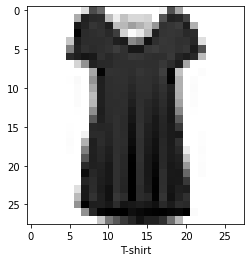

In [5]:
def plot_image(img, label):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.show()

rnd = randint(0, train_images.shape[0])
hyp = labels[train_labels[rnd]]
plot_image(train_images[rnd], hyp)

It is important that the values of the data are a number between 0 and 1; for this we use the auxiliary function `scale_data ()`, which we created above. 

In [6]:
train_images = scale_data(train_images)
test_images = scale_data(test_images)

In the cell below we create the network that we will use to train the data. The images consist of a matrix of 28 $ \ times $ 28 pixels, so the input layer is a vector of 784 nodes. We connect this input completely to a second layer of 128 nodes, to eventually have an output layer of 10 nodes (one node for each possible class). Graphically, that network then looks like this:

<img src="images/netwerk.png" style="width:40vw;">

In [7]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(len(labels), activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 2s 959us/step - loss: 0.6213 - accuracy: 0.7865
Epoch 2/6
1875/1875 [==============================] - 2s 939us/step - loss: 0.3822 - accuracy: 0.8606
Epoch 3/6
1875/1875 [==============================] - 2s 957us/step - loss: 0.3364 - accuracy: 0.8760
Epoch 4/6
1875/1875 [==============================] - 2s 906us/step - loss: 0.3114 - accuracy: 0.8854
Epoch 5/6
1875/1875 [==============================] - 2s 894us/step - loss: 0.2941 - accuracy: 0.8917
Epoch 6/6
1875/1875 [==============================] - 2s 948us/step - loss: 0.2794 - accuracy: 0.8971


## The confusion matrix

In this assignment, we will use the test data to determine how well our trained network is. As explained, the accuracy in itself is not sufficient to determine the performance of a classifier: if you would just gamble you would already have a score of ten percent for ten possible categories, and if you were to guess that a sample is not something accuracy even ninety percent. Better metrics for this are given by the confusion matrix, which is discussed during the theoretical part. 

<img src="images/confusion_matrix.png" style="width:30vw;">

In the cell below, complete the method `conf_matrix ()`. As you can see, this method gets two parameters, namely the values predicted by the network, and the actual values. Use the confusion_matrix method in TensorFlow to determine this matrix. Return the array.

In the second part of the cell is the method, with the predictions based on `test_images` and actual values of that test-data (` test_labels`). The result is then plotted.

<class 'numpy.ndarray'>


<Figure size 432x288 with 0 Axes>

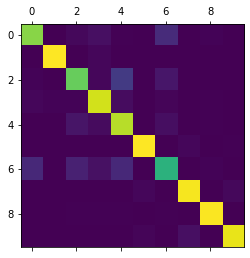

In [14]:
def conf_matrix(labels, pred):
    # Return the confusion matrix based on the given prediction and the current one
    # values (labels).
    # Check eventueel de documentatie van tf.math.confusion_matrix:
    # https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
    
    # YOUR CODE HERE
    # Based on https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python/48030708
    K = len(np.unique(labels)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(labels)):
        result[labels[i]][pred[i]] += 1
    return result

pred = np.argmax(model.predict(test_images), axis=1)
data = conf_matrix(test_labels, pred)
print(type(data))
plot_matrix(data)

## TP, TN, FP, FN

To extract more metrics from the trained model, not only the percentage of samples that are correctly classified is sufficient; we must therefore know which percentage is rightly classified as not of a certain class, which incorrectly as of a certain class, and which percentage is incorrectly classified as of a certain class: the so-called *true positives*, *true negatives*, *false positives* and *false negatives* (as discussed in the theoretical part).

The method `conf_els ()` in the cell below takes as a parameter the same numpy array that also underlies the image you created above. The *lines* of this matrix correspond to the actual value of the sample, the *columns* of this matrix correspond to the prediction of the sample by the model. Although semantically there are some remarks to be made, we define the above-described metrics as follows:

<p style="text-align:center">$tp_{i} = c_{ii}$</p>
<p style="text-align:center">$fp_{i} = \sum_{l=1}^n c_{li} - tp_{i}$</p>
<p style="text-align:center">$fn_{i} = \sum_{l=1}^n c_{il} - tp_{i}$<br/></p>
<p style="text-align:center">$tn_{i} = \sum_{l=1}^n \sum_{k=1}^n c_{lk} -tp_{i} - fp_{i} - fn_{i}$</p>


$ I $ is the category in question (so in this specific case it runs from 1 - 10). Implement the `conf_els ()` method, and return a list of these four metrics for each label - study the part of the implementation already given to get an idea of the exact form of the return value.

In [82]:
def conf_els(conf, labels): 
    # This method takes a confusion matrix (conf) and a set of labels. If it is good, it is
    # the dimensionality of the matrix equal to len (labels) × len (labels) (why?). Calculate the
    # values of the TP, FP, FN and TN in accordance with the calculation in the statement. Then make use of
    # the zip () and list () methods to return a list of len (labels), with each tuple
    # is defined as follows: 

    #     (category:string, tp:int, fp:int, fn:int, tn:int)
    # Check de documentatie van numpy diagonal om de eerste waarde te bepalen.
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.diagonal.html
    
    print(conf)
    for i in range(len(labels)):
        TP = int(conf[i,i])
        FP = int(np.sum(conf[:,i]) - TP)
        FN = int(np.sum(conf[i,:]) - TP)
        TN = int(np.sum(conf) - (TP + FP + FN))
        
        stats = (labels[i], TP, FP, FN, TN)
        print(stats)
    # YOUR CODE HERE
    pass
   



In [83]:
metrics = conf_els(data,labels)
print (metrics)

[[801.   0.  22.  40.   6.   1. 121.   0.   9.   0.]
 [  0. 976.   1.  18.   3.   0.   2.   0.   0.   0.]
 [  9.   0. 748.  17. 165.   0.  59.   0.   2.   0.]
 [ 19.  10.  11. 908.  33.   0.  14.   0.   5.   0.]
 [  0.   1.  56.  30. 871.   0.  38.   0.   4.   0.]
 [  0.   0.   0.   1.   0. 973.   0.  17.   2.   7.]
 [113.   1.  91.  42. 114.   0. 628.   0.  11.   0.]
 [  0.   0.   0.   0.   0.  18.   0. 962.   0.  20.]
 [  3.   1.   4.   4.   4.   3.   7.   3. 971.   0.]
 [  0.   0.   0.   1.   0.  12.   1.  41.   0. 945.]]
('T-shirt', 801, 144, 199, 8856)
('Trouser', 976, 13, 24, 8987)
('Pullover', 748, 185, 252, 8815)
('Dress', 908, 153, 92, 8847)
('Coat', 871, 325, 129, 8675)
('Sandals', 973, 34, 27, 8966)
('Shirt', 628, 242, 372, 8758)
('Sneaker', 962, 61, 38, 8939)
('Bag', 971, 33, 29, 8967)
('Boot', 945, 27, 55, 8973)
None


Now implement the method `conf_data ()`, in which you convert the data you created in the previous exercise into the following metrics:

<p style="text-align:center">$sensitivity (TPR) = \frac{tp}{tp + fn}$</p>
<p style="text-align:center">$precision (PPV) = \frac{tp}{tp + fp}$</p>
<p style="text-align:center">$specificity (TNR) = \frac{tn}{tn + fp}$</p>
<p style="text-align:center">$fall-out (FPR) = \frac{fp}{fp + tn}$</p>

This method gets the list from the previous problem: the total is then the sum of all $ tp $ 's of all labels - and similar calculations for the total $ tn $, $ fp $ and $ fn $. Return this data as a dictionary. 

In [19]:
def conf_data(metrics):
    # This method gets the list you made in the previous exercise (so with len (labels))
    # Use a list comprehension to calculate the total tp, fp, fn, and tn and
    # then determine the metrics mentioned in the statement. Return these values in the
    # form of a dictionary (the scaffold of this is given).

    # YOUR CODE HERE
    pass
   

Once you have implemented both of these methods, you can run the script in the cell below; here these values are calculated and printed.

In [20]:
metrics = conf_els(data,labels)
print (metrics)
print ("Bepalen van de scores:")
scores = conf_data(metrics)
print (scores)

[[801.   0.  22.  40.   6.   1. 121.   0.   9.   0.]
 [  0. 976.   1.  18.   3.   0.   2.   0.   0.   0.]
 [  9.   0. 748.  17. 165.   0.  59.   0.   2.   0.]
 [ 19.  10.  11. 908.  33.   0.  14.   0.   5.   0.]
 [  0.   1.  56.  30. 871.   0.  38.   0.   4.   0.]
 [  0.   0.   0.   1.   0. 973.   0.  17.   2.   7.]
 [113.   1.  91.  42. 114.   0. 628.   0.  11.   0.]
 [  0.   0.   0.   0.   0.  18.   0. 962.   0.  20.]
 [  3.   1.   4.   4.   4.   3.   7.   3. 971.   0.]
 [  0.   0.   0.   1.   0.  12.   1.  41.   0. 945.]]
None
Bepalen van de scores:
None


Can you say something about the quality of the programmed network based on these results?